In [4]:
import matplotlib.pyplot as plt
import numpy as np



```
Practica 6: Analisis de Fourier.
Laboratorio: Procesamiento Digital de señales
Harold Adrián Gómez Gil
```


<h2>2. GENERACION DE SEÑALES</h2>
<p>C=3
N=36 

para 2*C --> 6;
limite inferior  = -36/2  = -18 ;
limite superior = 0;

para -2*C  --> -6;
Limite inferior = 0;
Limite superior = 36/2 = 18
<p>

36


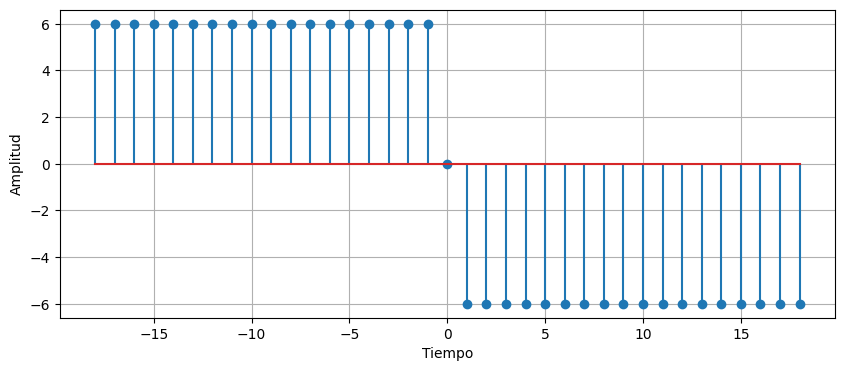

In [23]:
f= 1
C = 3
N =  30 + (2*C)
print(N)
pos_signal =2*C*np.ones(int(N/2))

neg_signal =-2*C*np.ones(int(N/2))
tot_sig =  np.concatenate((pos_signal , [0] , neg_signal))
t =  np.arange((-N/2), (N/2)+1, f)

plt.figure(figsize=(10,4))
plt.stem(t ,tot_sig)
plt.xlabel("Tiempo")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

<p>Con respecto a la señal geneerada se tiene una señal cuadrada de amplitud 6, es finita y es una señal impar. 
Ahora, con respecto a la impariedad de la señal esto se tiene por el cambio de amplitud, puesto que pasa de valores positivos a negativos e inclusive, tiene un cero.
Tambien se mantiene la simetria de los valores de amplitud positivos y los negativos</p>

<h2>3.COEFICIENTES DE LA SERIE DE FOURIER</h2>
<li>Calcule los coeficientes par e impar de la serie de Fourier para un k = 12.</li>
<li>Grafique en un subplot el espectro de potencia para la parte par y la impar. ¿Qu ́e puede concluir apartir de esto? ¿Tiene coeficientes en cero o muy cercanos a cero? ¿Por que?</li>
<li>Construya los coeficientes Ck a partir de los coeficientes pares e impares y grafıquelos</li>
<li>Calcule  la  potencia  de  la  se ̃nal  a  partir  de  los  coeficientes  encontrados  y  compruebe  el  teorema  deParseval. ¿Obtuvo el resultado esperado? Explique.</li>


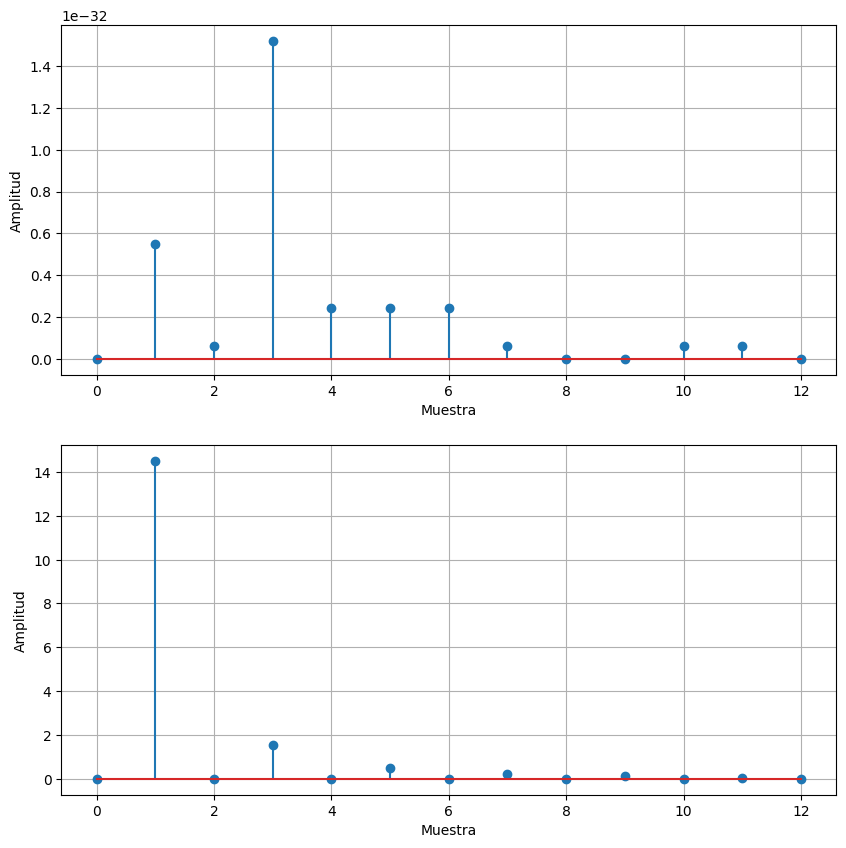

In [15]:
# calculo los ck para un k = 12 
k = 12
coeficientes =  np.arange(0,k+1,1)
Ck = []
CkReal = []
CkImag = []
for i in coeficientes:
    Ck.append((1/N)*sum(tot_sig*np.exp((-2.0j*np.pi*i*t)/N)))
    CkReal.append(Ck[i].real)
    CkImag.append(Ck[i].imag)
 

#Especto de potencia de la parte par e impar
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.stem(coeficientes,abs(np.array(CkReal))**2)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.subplot(212)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")   
plt.stem(coeficientes, abs(np.array(CkImag))**2)

plt.show()

<p>La descomposición de una serie en senos y cosenos se basa en la representación de una señal como una combinación de funciones sinusoidales. La parte par de la serie, que corresponde al coseno, se multiplica y se suma con la señal impar, lo que resulta en una señal impar que se anula cuando se suma. Por otro lado, la parte imaginaria de la serie, que corresponde al seno, se multiplica por la señal impar, lo que da como resultado una señal par con valores distintos de cero. Esto explica por qué la parte real de los coeficientes es prácticamente cero y los componentes imaginarios no lo son</p>

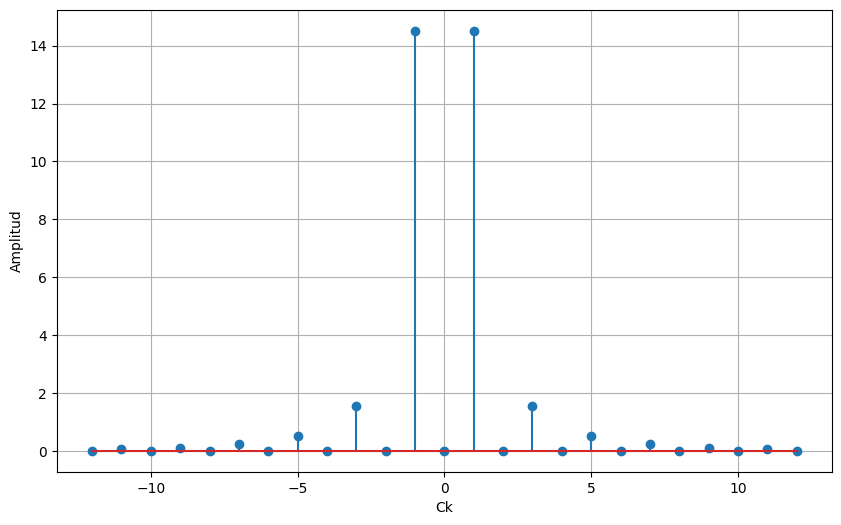

In [16]:
plt.figure(figsize=(10,6))
coef =  np.arange(-k,k+1,1)
espectro =abs(np.array(Ck))**2
espectro = np.concatenate((espectro[-1:0:-1], espectro))
plt.stem(coef,espectro)
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

<p>En lo que respecta al espectro de potencia obtenido, al tratarse de una señal impar, y la señal, generada no tiene una componente en cero, no hay un componente de valor DC (offset) en el espectro generado, por otro lado, se tiene que el mayor aporte en potencia lo van a dar las componentes imaginarias (el seno, por la parte impar) de la señal tiene componentes diferentes de cero, al momento de recrear el espectro, se tiene una grafica con las componentes impares y de forma simetrica, tal y como se espera<p>

In [27]:
parseval  =  2*sum(abs(np.array(Ck)**2))
print(f'la potencia obtenida mediante parseval es: {parseval}')

potenciaSignal =  (1/N)*sum(abs(tot_sig)**2)

print(potenciaSignal)

la potencia obtenida mediante parseval es: 33.93402358488355
36.0


<p> Para este caso no se cumple completamente el teorema de parceval, puesto que la potencia debe ser ecxactamente igual en ambos resultados. un por qué se está dando esto es por la cantidad de Ck que se está tomando, por lo cual no se reconstruye totalmente.</p>

<h2>4.SINTESIS DE SEÑALES</h2>

<li>Reconstruya la se ̃nal x(n) a partir de los coeficientes extra ́ıdos usando la ecuaci ́on de s ́ıntesis (Ecuaci ́on1). Grafique y concluya acerca de la se ̃nal obtenida.</li>
<li>Repita el procedimiento anterior para unk= 5 yk= (N2−1). ¿Qu ́e se puede observar al reducir y alincrementar el n ́umero de coeficientes?</li>
<li>¿Fue posible recuperar la se ̃nal en su totalidad? Cu ́antos coeficientes considera necesarios para recuperarla se ̃nal en su totalidad. Explique.</li>

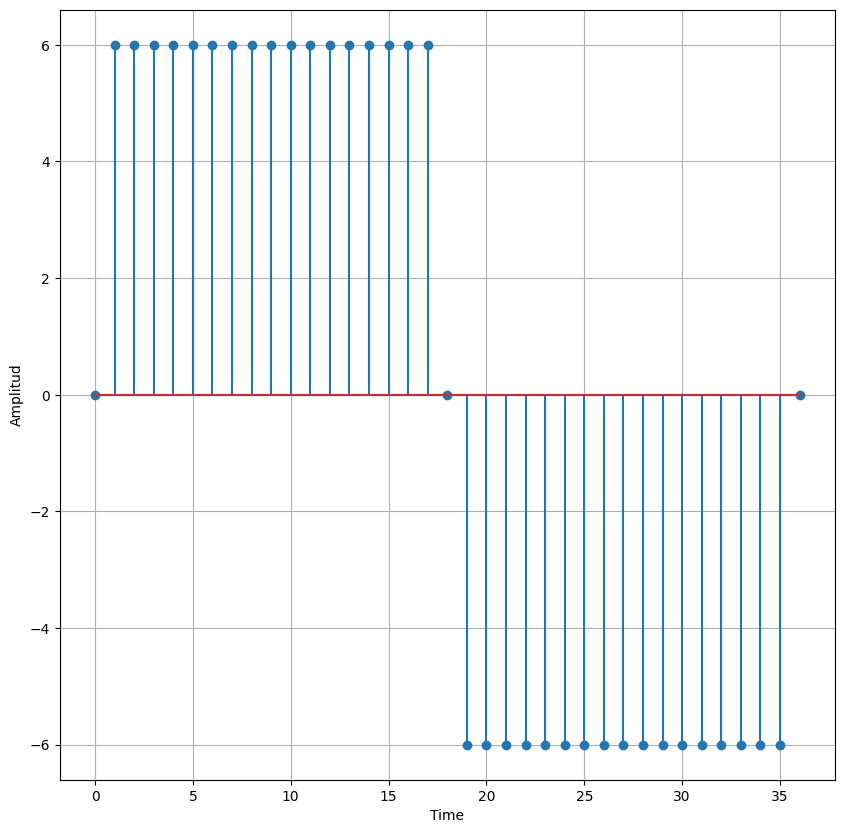

In [48]:
#Reconstrucción con los coeficientes extraidos
x_n = 0
for i in range(0,k+1,1) :
    x_n += Ck[i]*np.exp((2j*np.pi*i*t)/N)

plt.figure(figsize=(10,10))
plt.stem(2*x_n)
plt.ylabel("Amplitud")
plt.xlabel("Time")
plt.grid()
plt.show()

<li>Con respecto a la reconstrucción teniendo los Ck obtenidos en la serie, la señal cuadrada recuperada conserva las mismas caracteristicas de la original, en cuanto a su impariedad, y digamos que simetría (por la parte positiva y negativa), su principal diferencia tiene que ver con la amplitud de las muestras. </li>

In [ ]:
#Reconstrucción con los coeficientes extraidos
x_n = 0
for i in range(0,k+1,1) :
    x_n += Ck[i]*np.exp((2j*np.pi*i*t)/N)

plt.figure(figsize=(10,6))
plt.stem(2*x_n)
plt.ylabel("Amplitud")
plt.xlabel("Time")
plt.grid()
plt.show()

<h3>RECONSTRUCCION PARA K=5</h3>

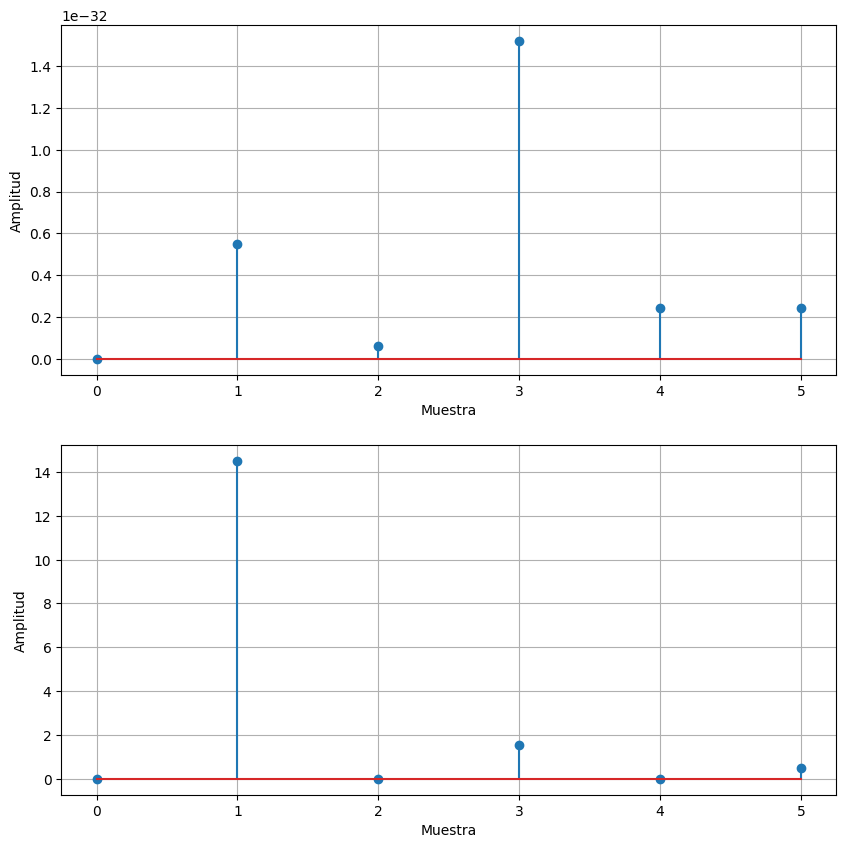

In [30]:
k_5 = 5
coeficientes =  np.arange(0,k_5+1,1)
Ck = []
CkReal = []
CkImag = []
for i in coeficientes:
    Ck.append((1/N)*sum(tot_sig*np.exp((-2.0j*np.pi*i*t)/N)))
    CkReal.append(Ck[i].real)
    CkImag.append(Ck[i].imag)
 

#Especto de potencia de la parte par e impar
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.stem(coeficientes,abs(np.array(CkReal))**2)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.subplot(212)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")   
plt.stem(coeficientes, abs(np.array(CkImag))**2)

plt.show()

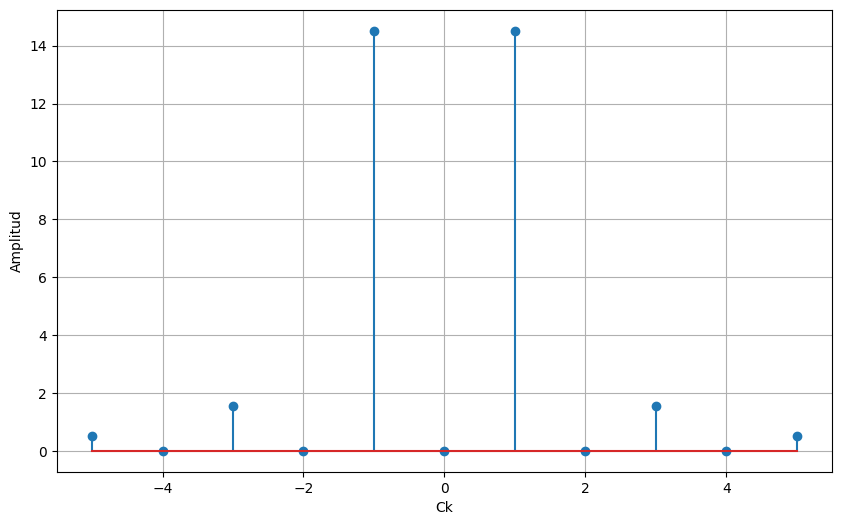

In [32]:
plt.figure(figsize=(10,6))
coef =  np.arange(-k_5,k_5+1,1)
espectro =abs(np.array(Ck))**2
espectro = np.concatenate((espectro[-1:0:-1], espectro))
plt.stem(coef,espectro)
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

c:\Users\Asus\OneDrive - Universidad de Antioquia\Documentos\proyect\workspace\PDS_lab\PDS\PDS\lib\site-packages\numpy\ma\core.py:3387: ComplexWarning: Casting complex values to real discards the imaginary part
  _data[indx] = dval
c:\Users\Asus\OneDrive - Universidad de Antioquia\Documentos\proyect\workspace\PDS_lab\PDS\PDS\lib\site-packages\matplotlib\cbook\__init__.py:1340: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


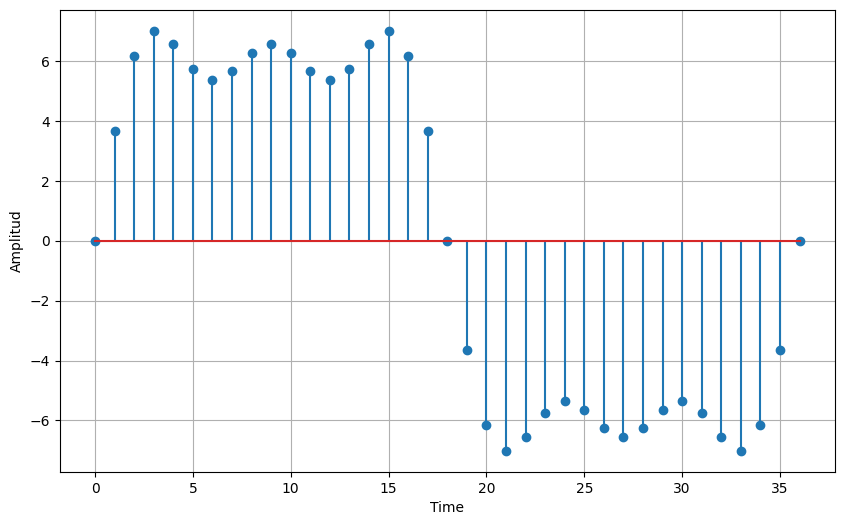

In [33]:
x_n5 = 0
for i in range(0,k_5+1,1) :
    x_n5 += Ck[i]*np.exp((2j*np.pi*i*t)/N)

plt.figure(figsize=(10,6))
plt.stem(2*x_n5)
plt.ylabel("Amplitud")
plt.xlabel("Time")
plt.grid()
plt.show()

<h3>RECONSTRUCCION PARA K=N/2 - 1</h3>

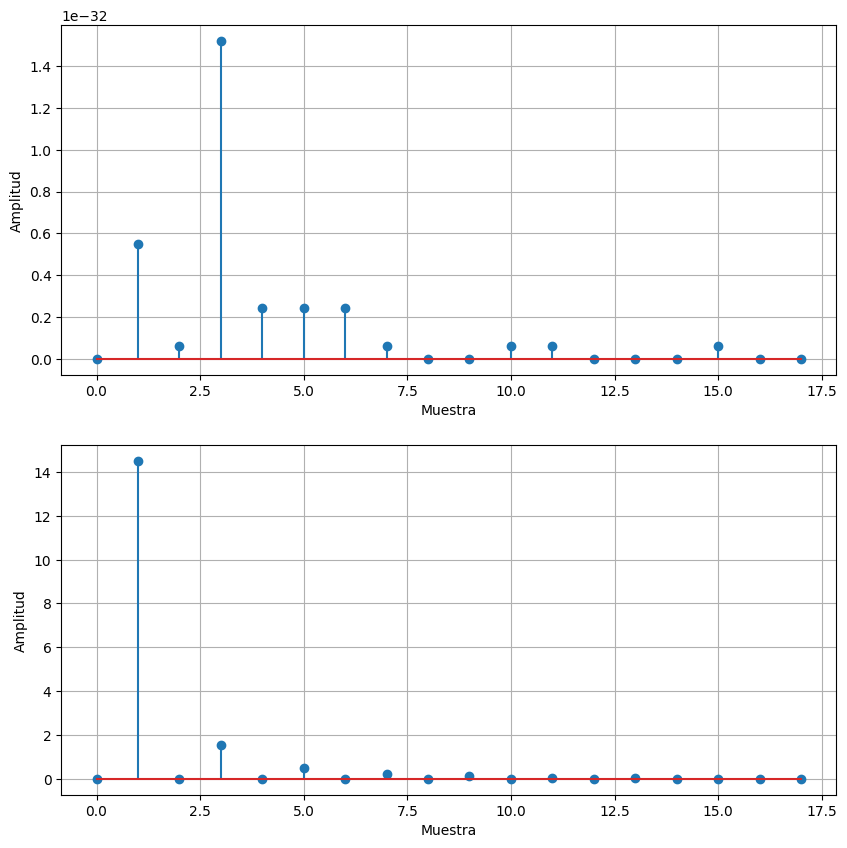

In [42]:
k17= 17
coeficientes =  np.arange(0,k17+1,1)
Ck = []
CkReal = []
CkImag = []
for i in coeficientes:
    Ck.append((1/N)*sum(tot_sig*np.exp((-2.0j*np.pi*i*t)/N)))
    CkReal.append(Ck[i].real)
    CkImag.append(Ck[i].imag)
 

#Especto de potencia de la parte par e impar
    
plt.figure(figsize=(10,10))
plt.subplot(211)
plt.stem(coeficientes,abs(np.array(CkReal))**2)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.subplot(212)
plt.grid()
plt.ylabel("Amplitud")
plt.xlabel("Muestra")   
plt.stem(coeficientes, abs(np.array(CkImag))**2)

plt.show()

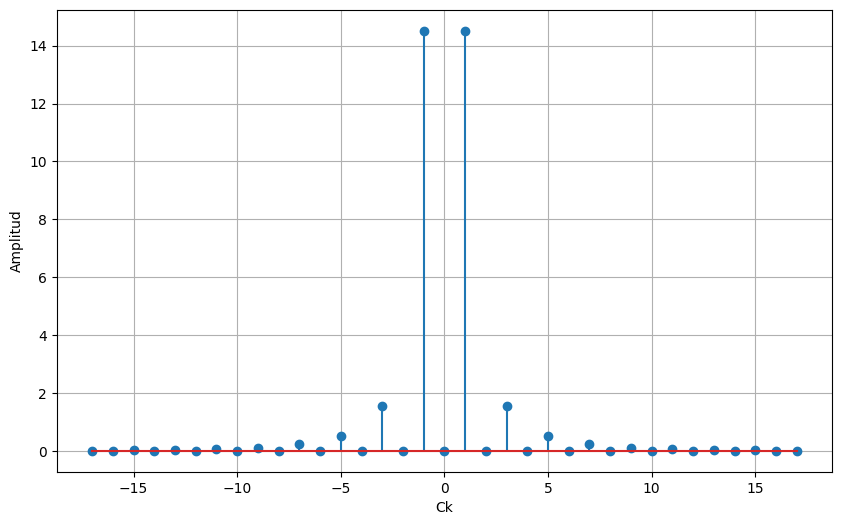

In [43]:
plt.figure(figsize=(10,6))
coef =  np.arange(-k17,k17+1,1)
espectro =abs(np.array(Ck))**2
espectro = np.concatenate((espectro[-1:0:-1], espectro))
plt.stem(coef,espectro)
plt.ylabel("Amplitud")
plt.xlabel("Ck")
plt.grid()
plt.show()

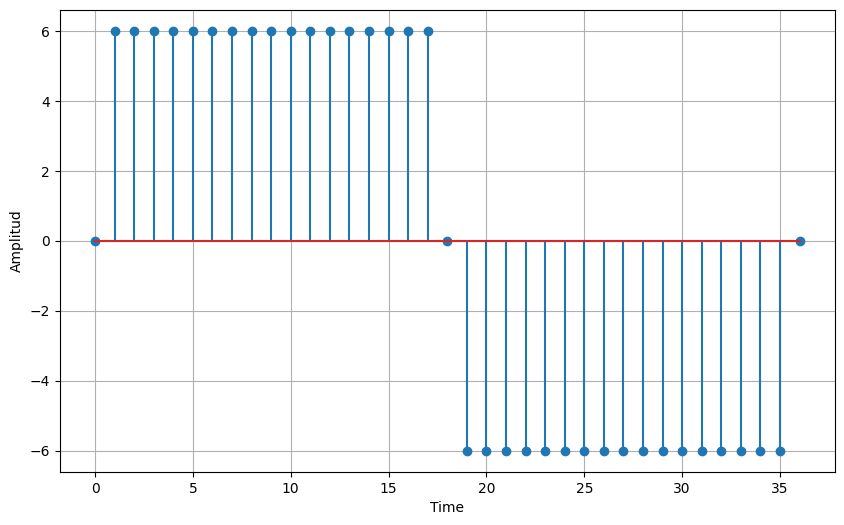

In [45]:
x_n17 = 0
for i in range(0,k17+1,1) :
    x_n17 += Ck[i]*np.exp((2j*np.pi*i*t)/N)

plt.figure(figsize=(10,6))
plt.stem(2*x_n17)
plt.ylabel("Amplitud")
plt.xlabel("Time")
plt.grid()
plt.show()

<p>En terminos generales al estar reconstruyendo las señales, se tiene que a menor cantidad de coeficientes obtenidos, la señal será mucho más alejada a la señal original, esto debido a la cantidad de valores que se estan considerando para la reconstrucción, a medida que el valor de K aumenta o disminuye esto afectará la calidad de la recuperación de la señal.</p>
<p>en terminos de las reconstrucciones de la señal discretizada la que mejor se aproxima es un valor cercano al valor N del total de muestras, permitiendo recuperar una mejor señal sin necesidad de considerar infinitas muestras, ya que no es el proposito</p>

<h2>CONCLUSIONES<h2>

<li>En terminos de reconstrucción de una señal a mayor cantidad de coeficientes la señal será más cercana a la original</li>
<li>la serie de Fourier permite descomponer una señal periódica en componentes sinusoidales, mientras que el teorema de Parseval proporciona una relación entre la energía o potencia en el dominio del tiempo y el dominio de la frecuencia. Estos conceptos son fundamentales para comprender y analizar señales y sistemas en el mundo discreto</li>
<li>En una señal impar , los coeficientes de la serie solo van a tener componentes impares, que van a aportar al espectro en potencia, a diferencia de las componentes reales y pares , donde su valor es cero practicamente</li>

